In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
df=pd.read_csv("AirPassengers.csv" ,parse_dates = ['Month'], index_col=['Month'])

In [3]:
df["random_ts"] = np.random.rand(df.shape[0])


In [4]:
df.head()

,#Passengers,random_ts
Month,,
1949-01-01,112,0.515516
1949-02-01,118,0.667267
1949-03-01,132,0.350750
1949-04-01,129,0.614533
1949-05-01,121,0.827435


<Axes: xlabel='Month'>

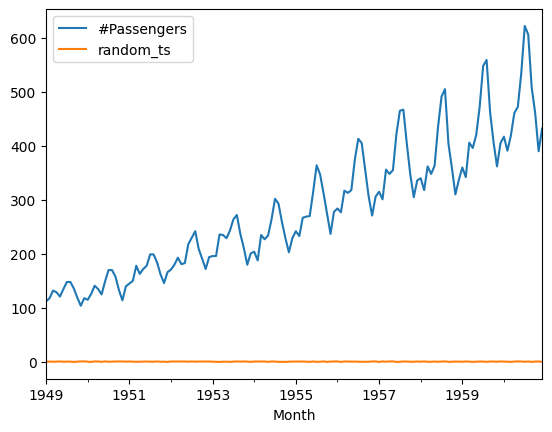

In [5]:
df.plot()

In [6]:
X=df.drop(columns="random_ts")
y=df["random_ts"]

**TimeSeriesSplit**

Think of `TimeSeriesSplit` as the reliable timekeeper of your data splits. It divides your data into sequential folds, ensuring each training set is formed from past data and each test set from future data.

In [7]:
from sklearn.model_selection import TimeSeriesSplit
tsv=TimeSeriesSplit(n_splits=5)
for train_index , test_index in tsv.split(X):
     X_train, X_valid=X.iloc[train_index],X.iloc[test_index]
     y_train,y_valid=y.iloc[train_index],y.iloc[test_index]

**Sliding/Rolling Window Split**

In the rolling window approach, your model moves forward in time with a fixed-size training window that slides along your dataset. It’s like taking steps into the future while always keeping an eye on the past.


In [12]:
series=pd.Series(np.random.rand(len(X)),index=X.index)
series

Month
1949-01-01    0.962608
1949-02-01    0.872330
1949-03-01    0.024793
1949-04-01    0.869895
1949-05-01    0.551966
                ...   
1960-08-01    0.119150
1960-09-01    0.117444
1960-10-01    0.134699
1960-11-01    0.562980
1960-12-01    0.752529
Length: 144, dtype: float64

In [11]:
for date in pd.date_range(start="1949-01-01", end="1949-12-31", freq="M"):
     train_start=date-pd.offsets.MonthBegin(1)
     train_end=date-pd.offsets.Day(1)
     valid_start = date
     valid_end = date + pd.offsets.MonthEnd(1)

     train = series.loc[train_start:train_end]
     valid = series.loc[valid_start:valid_end]

**Expanding Window Split**

With the expanding window split, your model starts with a small training set and gradually includes more observations as it progresses. It’s like accumulating knowledge over time, incorporating more data as it moves forward.



In [15]:
for date in pd.date_range(start="1949-01-01", end="1949-12-31", freq="M"):
    train=series.loc[ :date- pd.offsets.Day(1)]
    valid=series.loc[date : date + pd.offsets.MonthEnd(1)]

**Sliding Window with Gap Split**

The sliding window with a gap introduces a buffer zone between your training and validation sets, ensuring no information from the future leaks into your model’s training. It’s like building a fence to keep your model focused on the present.

In [16]:
for date in pd.date_range('1949-01-01', '1949-01-01', freq='M'):
 delta = date - pd.offsets.MonthBegin(1)
 train = series.loc[delta:date-pd.offsets.Day(1)]